In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
# XGBoost (jodi ইনস্টল থাকে)a

try:
    import xgboost as xgb
    has_xgb = True
except Exception as e:
    has_xgb = False

plt.rcParams['figure.figsize'] = (8,5)


In [2]:
file1 = "All Book List.xlsx"
file2 = "Sell- 2023.xlsx"
file3 = "Sell - 2024.xlsx"
file4 = "Sell - 2025.xlsx"

df1 = pd.read_excel(file1)        
df2 = pd.read_excel(file2)        
df3 = pd.read_excel(file3)        
df4 = pd.read_excel(file4)  

print("Shapes:", df1.shape, df2.shape, df3.shape, df4.shape)
df1.head()



Shapes: (3488, 11) (3080, 24) (5019, 25) (5316, 27)


,Category Of Books,Name of Books,Book's Genre,Publication,Discount %,Discounted Price,মুদ্রিত মুল্য,ক্রয় মুল্য,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,গ্রাফিক নভেল আমার দেখা নয়াচীন,NaN,সেন্টার ফর রিসার্চ এন্ড ইনফরমেশন,NaN,200.0,1000,NaN,NaN,NaN,NaN
1,বইনগর,সেই সব চরিত্র বুকমার্ক সেট,NaN,NaN,NaN,150.0,NaN,100.0,NaN,NaN,NaN
2,NaN,জীবনানন্দ দাশ ভিন্টেজ বুকমার্ক বক্সসেট (২০ পিস),NaN,NaN,NaN,200.0,NaN,150.0,NaN,NaN,NaN
3,ওরা হৃদয়ের রং চেনে না,Animal City (ম্যাও 🐱) বুকমার্ক সেট,NaN,NaN,NaN,120.0,NaN,70.0,NaN,NaN,NaN
4,NaN,বুক-রিডার বুকমার্ক সেট (৮ পিস),NaN,NaN,NaN,40.0,NaN,25.0,NaN,NaN,NaN


In [3]:
print('The Statical Review of the Data :\n')
print(df1.describe())

The Statical Review of the Data :

       Book's Genre  Discounted Price   ক্রয় মুল্য  Unnamed: 11
count           0.0       3330.000000   3314.000000     5.000000
mean            NaN        235.928315    196.642571  1136.000000
std             NaN        250.287618    215.822667     1.581139
min             NaN          0.000000      0.000000  1134.000000
25%             NaN        124.155000    100.000000  1135.000000
50%             NaN        187.500000    152.400000  1136.000000
75%             NaN        280.000000    239.400000  1137.000000
max             NaN       5715.200000   5000.800000  1138.000000


In [4]:
print('The Statical Review of the Data for the year of 2023:\n')
print(df2.describe())

The Statical Review of the Data for the year of 2023:

        Unnamed: 0          SL         Age         Unit  Review(Out of 5)  \
count  1942.000000  608.000000  608.000000  1743.000000        608.000000   
mean      0.313594  305.598684   38.585526     1.080321          4.223026   
min       0.000000    1.000000   18.000000     1.000000          3.000000   
25%       0.000000  153.750000   28.000000     1.000000          3.800000   
50%       0.000000  306.500000   38.000000     1.000000          4.500000   
75%       1.000000  457.250000   48.000000     1.000000          4.500000   
max       1.000000  609.000000   60.000000    18.000000          5.000000   
std       0.464073  175.692061   11.820845     0.638757          0.537303   

             Price        Cost                     Order Date         Sell  \
count  1722.000000  600.000000                            606   606.000000   
mean    189.217480   37.291667  2023-09-15 20:54:39.207920640   601.066007   
min       0.00000

In [5]:
print('The Statical Review of the Data for the year of 2024:\n')
print(df3.describe())

The Statical Review of the Data for the year of 2024:

        Unnamed: 0          Age  Review(Out of 5)         Unit        Price  \
count  2171.000000  1101.000000       4019.000000  3984.000000  3937.000000   
mean      0.507140    28.866485          1.121921     1.077058   202.443993   
min       0.000000    18.000000          0.000000     1.000000     0.000000   
25%       0.000000    24.000000          0.000000     1.000000   100.000000   
50%       1.000000    27.000000          0.000000     1.000000   165.000000   
75%       1.000000    30.000000          3.000000     1.000000   241.000000   
max       1.000000    60.000000          5.000000    50.000000  5190.000000   
std       0.500064     7.315946          1.858292     0.985629   179.780306   

              Cost                     Order Date          Sell  Unnamed: 21  \
count  1105.000000                           1135   1135.000000          0.0   
mean     46.234389  2024-06-22 16:25:47.841409536    780.661674          

In [6]:
print('The Statical Review of the Data for the year of 2025 :\n')
print(df4.describe())

The Statical Review of the Data for the year of 2025 :

        Unnamed: 0          Age         Unit  Review(Out of 5)        Price  \
count  2140.000000  1057.000000  4255.000000       1057.000000  4149.000000   
mean      0.498598    28.482498     1.048649          4.180984   259.682333   
min       0.000000    18.000000     1.000000          3.000000     0.000000   
25%       0.000000    24.000000     1.000000          3.800000   130.000000   
50%       0.000000    27.000000     1.000000          4.000000   225.000000   
75%       1.000000    30.000000     1.000000          4.500000   348.000000   
max       1.000000    60.000000    40.000000          5.000000  5378.000000   
std       0.500115     7.199532     0.749381          0.549421   189.354941   

              Cost                     Order Date          Sell  Unnamed: 20  \
count  1065.000000                           1089   1089.000000          0.0   
mean     90.208451  2025-05-06 11:01:09.421487360   1110.245638         

In [7]:
print('The Information of the Data of All Book List :\n')
df1.info()

The Information of the Data of All Book List :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3488 entries, 0 to 3487
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category Of Books  64 non-null     object 
 1   Name of Books      3339 non-null   object 
 2   Book's Genre       0 non-null      float64
 3   Publication        484 non-null    object 
 4   Discount %         91 non-null     object 
 5   Discounted Price   3330 non-null   float64
 6   মুদ্রিত মুল্য      2790 non-null   object 
 7    ক্রয় মুল্য       3314 non-null   float64
 8   Unnamed: 9         160 non-null    object 
 9   Unnamed: 10        11 non-null     object 
 10  Unnamed: 11        5 non-null      float64
dtypes: float64(4), object(7)
memory usage: 299.9+ KB


In [8]:
print('The Information of the Data for the year of 2023:\n')
df2.info()

The Information of the Data for the year of 2023:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            1942 non-null   float64       
 1   SL                    608 non-null    float64       
 2   Gender                608 non-null    object        
 3   Age                   608 non-null    float64       
 4   Repeated Customer?    608 non-null    object        
 5   Name of Books         1744 non-null   object        
 6   Unit                  1743 non-null   float64       
 7   Review(Out of 5)      608 non-null    float64       
 8   Confirmation          608 non-null    object        
 9   Price                 1722 non-null   float64       
 10  Cost                  600 non-null    float64       
 11  Payment Method        607 non-null    object        
 12  Status                607

In [9]:
print('The Information of the Data for the year of 2024:\n')
df3.info()

The Information of the Data for the year of 2024:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          2171 non-null   float64       
 1   SL                  1132 non-null   object        
 2   Gender              1101 non-null   object        
 3   Age                 1101 non-null   float64       
 4   Review(Out of 5)    4019 non-null   float64       
 5   Name of Books       3944 non-null   object        
 6   Unit                3984 non-null   float64       
 7   Repeated Customer?  1101 non-null   object        
 8   Confirmation        1135 non-null   object        
 9   Price               3937 non-null   float64       
 10  Cost                1105 non-null   float64       
 11  Payment Method      1121 non-null   object        
 12  Status              1135 non-null   object        
 1

In [10]:
print('The Information of the Data for the year of 2025:\n')
df4.info()

The Information of the Data for the year of 2025:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5316 entries, 0 to 5315
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          2140 non-null   float64       
 1   SL                  1089 non-null   object        
 2   Gender              1057 non-null   object        
 3   Age                 1057 non-null   float64       
 4   Repeated Customer?  1057 non-null   object        
 5   Title               4168 non-null   object        
 6   Unit                4255 non-null   float64       
 7   Review(Out of 5)    1057 non-null   float64       
 8   Confirmation        1089 non-null   object        
 9   Price               4149 non-null   float64       
 10  Cost                1065 non-null   float64       
 11  Payment Method      1081 non-null   object        
 12  Status              1089 non-null   object        
 1

In [11]:
null_counts = df2.isnull().sum()
print(null_counts)


Unnamed: 0              1138
SL                      2472
Gender                  2472
Age                     2472
Repeated Customer?      2472
Name of Books           1336
Unit                    1337
Review(Out of 5)        2472
Confirmation            2472
Price                   1358
Cost                    2480
Payment Method          2473
Status                  2473
Order Date              2474
Sell                    2474
Delivery Method         2473
Delivery Status         2473
Address                 2485
Customer Phone          2492
Unnamed: 19             3073
MONTHLY ONLINE SALES    3080
Unnamed: 21             3080
Unnamed: 22             3080
Unnamed: 23             3066
dtype: int64


In [12]:
null_counts = df3.isnull().sum()
print(null_counts)


Unnamed: 0            2848
SL                    3887
Gender                3918
Age                   3918
Review(Out of 5)      1000
Name of Books         1075
Unit                  1035
Repeated Customer?    3918
Confirmation          3884
Price                 1082
Cost                  3914
Payment Method        3898
Status                3884
Order Date            3884
Sell                  3884
Delivery Method       3884
Delivery Status       3884
Address               3926
Customer Phone        3935
Unnamed: 19           4706
Unnamed: 20           5006
Unnamed: 21           5019
Unnamed: 22           5019
Unnamed: 23           5019
Unnamed: 24           5005
dtype: int64


In [13]:
null_counts = df4.isnull().sum()
print(null_counts)


Unnamed: 0            3176
SL                    4227
Gender                4259
Age                   4259
Repeated Customer?    4259
Title                 1148
Unit                  1061
Review(Out of 5)      4259
Confirmation          4227
Price                 1167
Cost                  4251
Payment Method        4235
Status                4227
Order Date            4227
Sell                  4227
Delivery Method       4227
Delivery Status       4227
Address               4230
Customer Phone        4248
Unnamed: 19           4475
Unnamed: 20           5316
Unnamed: 21           5284
Unnamed: 22           5316
Unnamed: 23           5316
Unnamed: 24           5316
Unnamed: 25           5316
Unnamed: 26           5305
dtype: int64


In [14]:
df1.columns

Index(['Category Of Books', 'Name of Books', 'Book's Genre', 'Publication',
       'Discount %', 'Discounted Price', 'মুদ্রিত মুল্য', ' ক্রয় মুল্য',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [15]:
cols_to_drop = [
    'Unnamed: 9', 'Unnamed: 10',  'Unnamed: 11',]
    

df1 = df1.drop(columns=cols_to_drop, errors='ignore')

In [16]:
df1.columns

Index(['Category Of Books', 'Name of Books', 'Book's Genre', 'Publication',
       'Discount %', 'Discounted Price', 'মুদ্রিত মুল্য', ' ক্রয় মুল্য'],
      dtype='object')

In [17]:
df2.columns

Index(['Unnamed: 0', 'SL', 'Gender', 'Age', 'Repeated Customer?',
       'Name of Books', 'Unit', 'Review(Out of 5)', 'Confirmation', 'Price',
       'Cost', 'Payment Method', 'Status', 'Order Date', 'Sell',
       'Delivery Method', 'Delivery Status', 'Address', 'Customer Phone',
       'Unnamed: 19', 'MONTHLY ONLINE SALES', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [18]:
cols_to_drop = [
    'Unnamed: 0',  'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23',
    'Unnamed: 22'
    
]

df2 = df2.drop(columns=cols_to_drop, errors='ignore')


In [19]:
df2.columns


Index(['SL', 'Gender', 'Age', 'Repeated Customer?', 'Name of Books', 'Unit',
       'Review(Out of 5)', 'Confirmation', 'Price', 'Cost', 'Payment Method',
       'Status', 'Order Date', 'Sell', 'Delivery Method', 'Delivery Status',
       'Address', 'Customer Phone', 'MONTHLY ONLINE SALES'],
      dtype='object')

In [20]:
df3.columns

Index(['Unnamed: 0', 'SL', 'Gender', 'Age', 'Review(Out of 5)',
       'Name of Books', 'Unit', 'Repeated Customer?', 'Confirmation', 'Price',
       'Cost', 'Payment Method', 'Status', 'Order Date', 'Sell',
       'Delivery Method', 'Delivery Status', 'Address', 'Customer Phone',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [21]:
cols_to_drop = [
    'Unnamed: 0',  'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23',
    'Unnamed: 22','Unnamed: 24'
    
]

df3 = df3.drop(columns=cols_to_drop, errors='ignore')

In [22]:
df3.columns

Index(['SL', 'Gender', 'Age', 'Review(Out of 5)', 'Name of Books', 'Unit',
       'Repeated Customer?', 'Confirmation', 'Price', 'Cost', 'Payment Method',
       'Status', 'Order Date', 'Sell', 'Delivery Method', 'Delivery Status',
       'Address', 'Customer Phone', 'Unnamed: 20'],
      dtype='object')

#### 

In [23]:
df4.columns

Index(['Unnamed: 0', 'SL', 'Gender', 'Age', 'Repeated Customer?', 'Title',
       'Unit', 'Review(Out of 5)', 'Confirmation', 'Price', 'Cost',
       'Payment Method', 'Status', 'Order Date', 'Sell', 'Delivery Method',
       'Delivery Status', 'Address', 'Customer Phone', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [24]:
cols_to_drop = [
    'Unnamed: 0',  'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23',
    'Unnamed: 22','Unnamed: 24','Unnamed: 25', 'Unnamed: 26','Unnamed: 20'
    
]

df4 = df3.drop(columns=cols_to_drop, errors='ignore')

In [25]:
df4.columns

Index(['SL', 'Gender', 'Age', 'Review(Out of 5)', 'Name of Books', 'Unit',
       'Repeated Customer?', 'Confirmation', 'Price', 'Cost', 'Payment Method',
       'Status', 'Order Date', 'Sell', 'Delivery Method', 'Delivery Status',
       'Address', 'Customer Phone'],
      dtype='object')

In [26]:

# Minimum age
min_age = df2['Age'].min()

# Maximum age
max_age = df2['Age'].max()

# Average (mean) age
avg_age = df2['Age'].mean()

print(f"Minimum Age of 2023: {min_age}")
print(f"Maximum Age of 2023: {max_age}")
print(f"Average Age of 2023: {avg_age:.2f}")


Minimum Age of 2023: 18.0
Maximum Age of 2023: 60.0
Average Age of 2023: 38.59


In [27]:
# Minimum age
min_age = df3['Age'].min()

# Maximum age
max_age = df3['Age'].max()

# Average (mean) age
avg_age = df3['Age'].mean()

print(f"Minimum Age of 2024: {min_age}")
print(f"Maximum Age of 2024: {max_age}")
print(f"Average Age of 2024: {avg_age:.2f}")


Minimum Age of 2024: 18.0
Maximum Age of 2024: 60.0
Average Age of 2024: 28.87


In [28]:
# Minimum age
min_age = df4['Age'].min()

# Maximum age
max_age = df4['Age'].max()

# Average (mean) age
avg_age = df4['Age'].mean()

print(f"Minimum Age of 2025: {min_age}")
print(f"Maximum Age of 2025: {max_age}")
print(f"Average Age of 2025: {avg_age:.2f}")

Minimum Age of 2025: 18.0
Maximum Age of 2025: 60.0
Average Age of 2025: 28.87


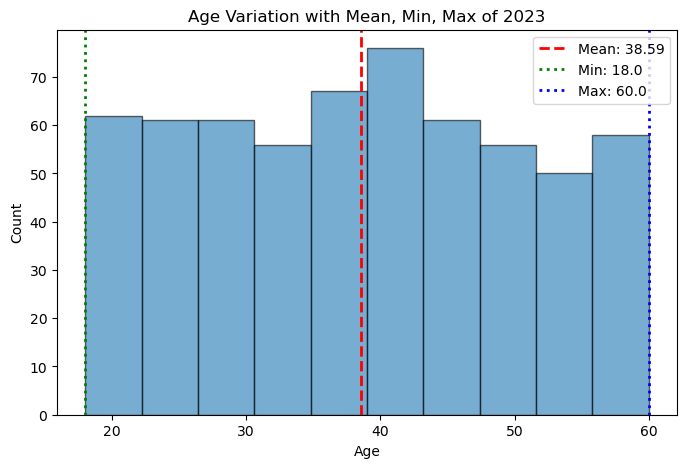

In [29]:
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(df2['Age'], bins=10, edgecolor='black', alpha=0.6)
plt.axvline(df2['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df2['Age'].mean():.2f}")
plt.axvline(df2['Age'].min(), color='green', linestyle='dotted', linewidth=2, label=f"Min: {df2['Age'].min()}")
plt.axvline(df2['Age'].max(), color='blue', linestyle='dotted', linewidth=2, label=f"Max: {df2['Age'].max()}")
plt.title("Age Variation with Mean, Min, Max of 2023")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


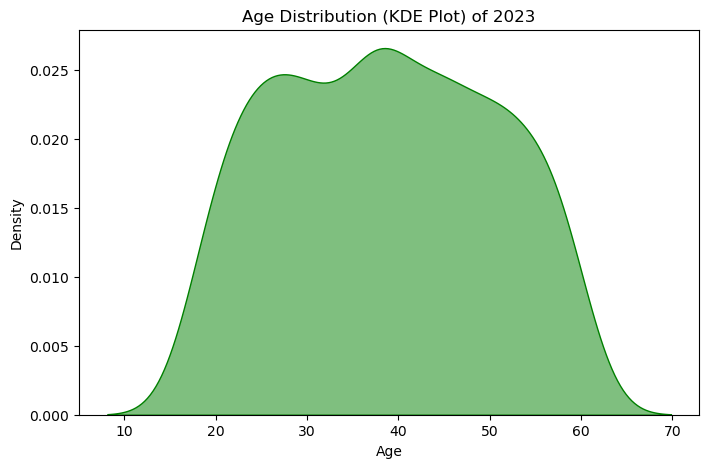

In [30]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(df2['Age'], fill=True, color='green', alpha=0.5)
plt.title("Age Distribution (KDE Plot) of 2023")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


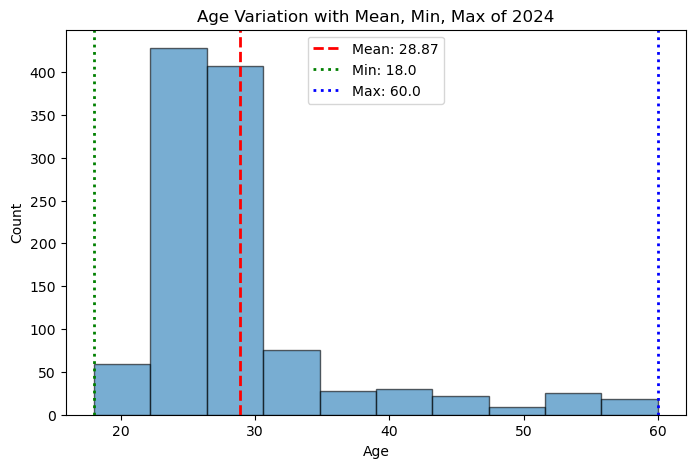

In [31]:
plt.figure(figsize=(8,5))
plt.hist(df3['Age'], bins=10, edgecolor='black', alpha=0.6)
plt.axvline(df3['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df3['Age'].mean():.2f}")
plt.axvline(df3['Age'].min(), color='green', linestyle='dotted', linewidth=2, label=f"Min: {df3['Age'].min()}")
plt.axvline(df3['Age'].max(), color='blue', linestyle='dotted', linewidth=2, label=f"Max: {df3['Age'].max()}")
plt.title("Age Variation with Mean, Min, Max of 2024")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


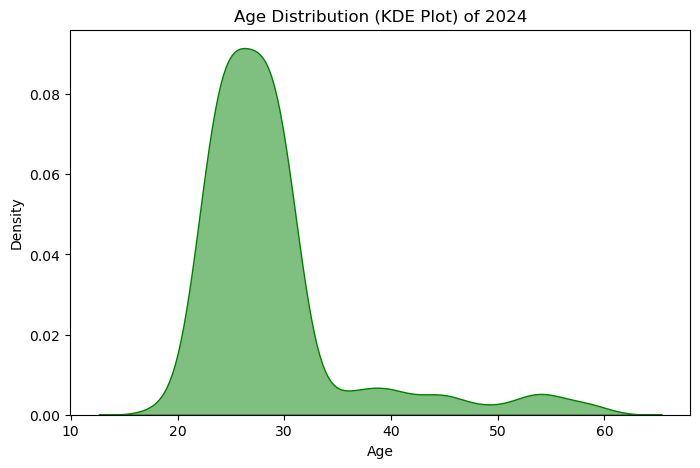

In [32]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(df3['Age'], fill=True, color='green', alpha=0.5)
plt.title("Age Distribution (KDE Plot) of 2024")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

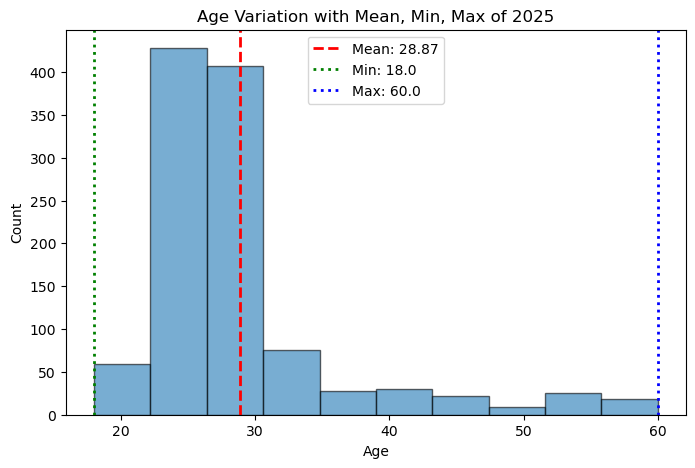

In [33]:
plt.figure(figsize=(8,5))
plt.hist(df4['Age'], bins=10, edgecolor='black', alpha=0.6)
plt.axvline(df4['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df4['Age'].mean():.2f}")
plt.axvline(df4['Age'].min(), color='green', linestyle='dotted', linewidth=2, label=f"Min: {df4['Age'].min()}")
plt.axvline(df4['Age'].max(), color='blue', linestyle='dotted', linewidth=2, label=f"Max: {df4['Age'].max()}")
plt.title("Age Variation with Mean, Min, Max of 2025")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


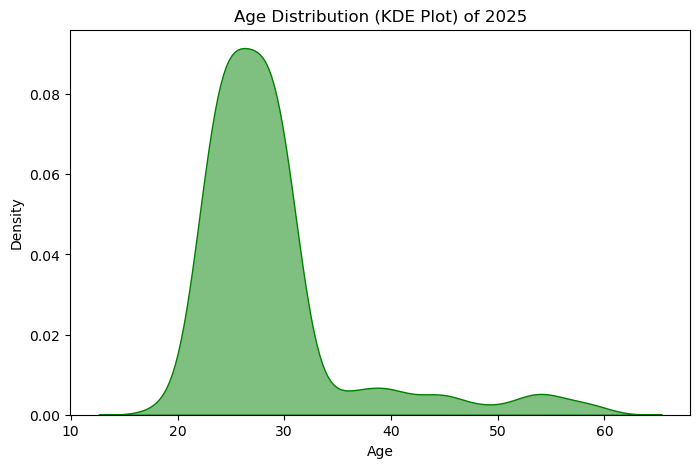

In [34]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(df4['Age'], fill=True, color='green', alpha=0.5)
plt.title("Age Distribution (KDE Plot) of 2025")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Excel ফাইলগুলো পড়া
file2 = "Sell- 2023.xlsx"
file3 = "Sell - 2024.xlsx"
file4 = "Sell - 2025.xlsx"

df_2023 = pd.read_excel(file2)
df_2024 = pd.read_excel(file3)
df_2025 = pd.read_excel(file4)

# Step 2: প্রতিটা dataset এ Year কলাম যোগ করা
df_2023['Year'] = 2023
df_2024['Year'] = 2024
df_2025['Year'] = 2025

df_all = pd.concat([df_2023, df_2024, df_2025], ignore_index=True)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


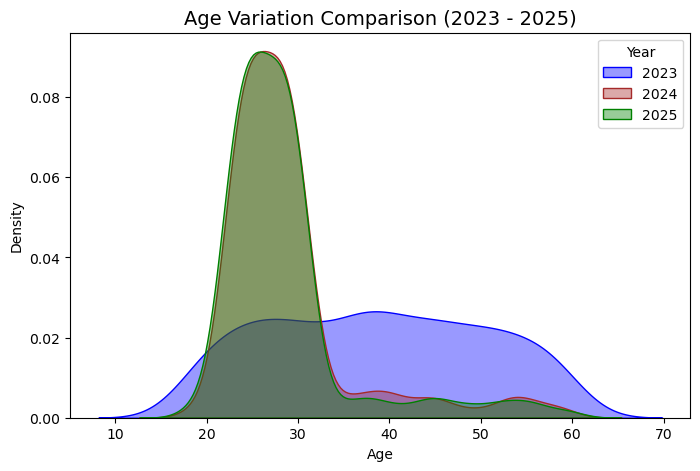

In [36]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_all[df_all['Year'] == 2023]['Age'], fill=True, label='2023', alpha=0.4,color='blue')
sns.kdeplot(df_all[df_all['Year'] == 2024]['Age'], fill=True, label='2024', alpha=0.4,color='brown')
sns.kdeplot(df_all[df_all['Year'] == 2025]['Age'], fill=True, label='2025', alpha=0.4,color='green')

plt.title("Age Variation Comparison (2023 - 2025)", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Year")
plt.show()

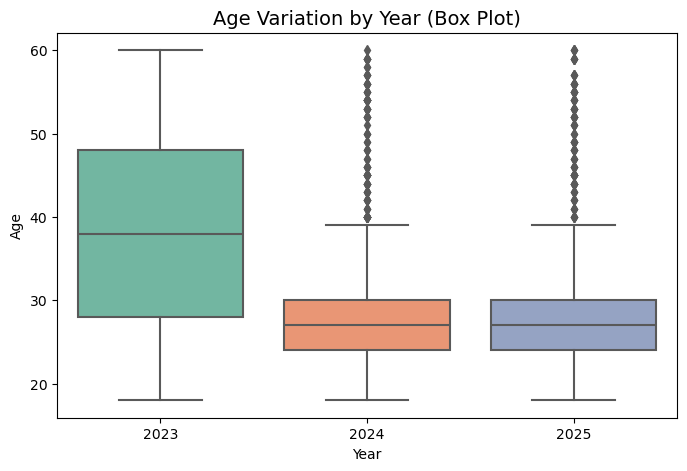

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Age', data=df_all, palette='Set2')
plt.title("Age Variation by Year (Box Plot)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()


In [38]:
summary = df_all.groupby('Year')['Age'].agg(['min', 'max', 'mean']).reset_index()
print(summary)

   Year   min   max       mean
0  2023  18.0  60.0  38.585526
1  2024  18.0  60.0  28.866485
2  2025  18.0  60.0  28.482498


<Axes: xlabel='Gender', ylabel='count'>

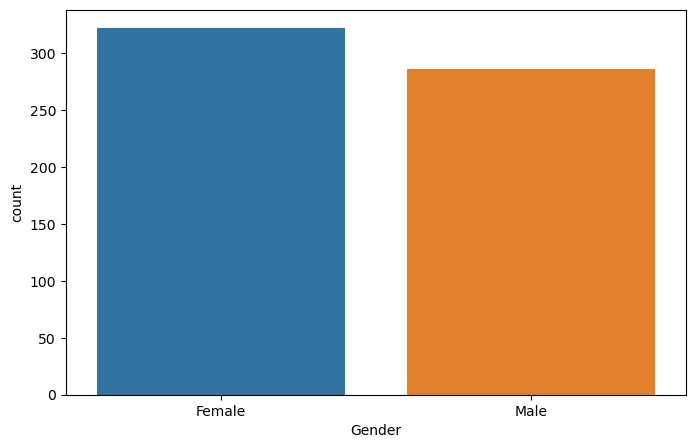

In [39]:

sns.countplot(x='Gender', data=df_2023)

<Axes: xlabel='Gender', ylabel='count'>

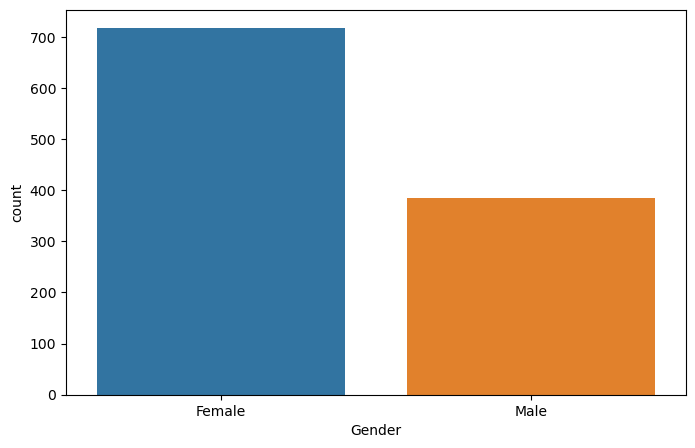

In [40]:
sns.countplot(x='Gender', data=df_2024)

<Axes: xlabel='Gender', ylabel='count'>

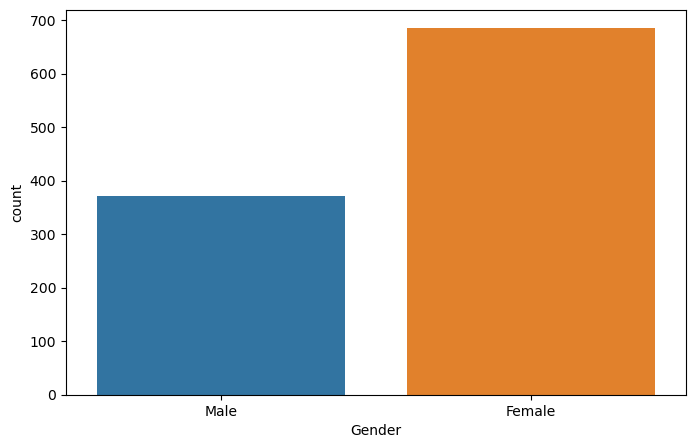

In [41]:
sns.countplot(x='Gender', data=df_2025)

<Axes: xlabel='Year', ylabel='count'>

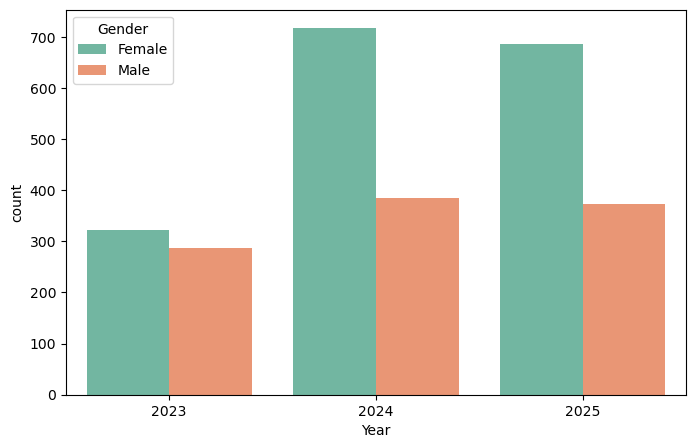

In [42]:
sns.countplot(x='Year', hue='Gender', data=df_all, palette='Set2')


In [43]:
gender_count = df_all['Gender'].value_counts()
print(gender_count)


Gender
Female    1724
Male      1042
Name: count, dtype: int64


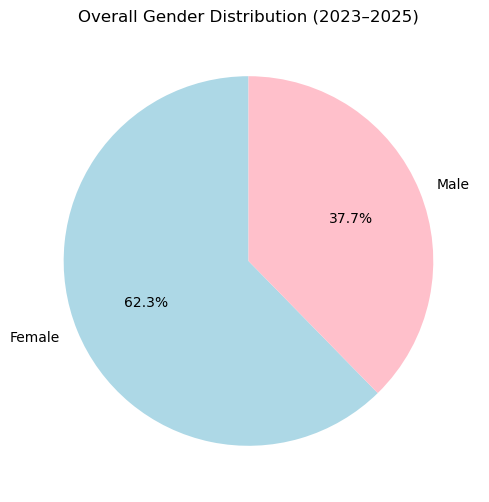

In [44]:

plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title("Overall Gender Distribution (2023–2025)")
plt.show()


In [45]:
df_all.rename(columns={'gender': 'Gender', 'year': 'Year'}, inplace=True)


In [46]:
gender_count = df_all.groupby(['Year', 'Gender']).size().unstack(fill_value=0)
print(gender_count)


Gender  Female  Male
Year                
2023       322   286
2024       717   384
2025       685   372


In [47]:
gender_count['Male_Female_Ratio'] = gender_count['Male'] / gender_count['Female']
print(gender_count)


Gender  Female  Male  Male_Female_Ratio
Year                                   
2023       322   286           0.888199
2024       717   384           0.535565
2025       685   372           0.543066


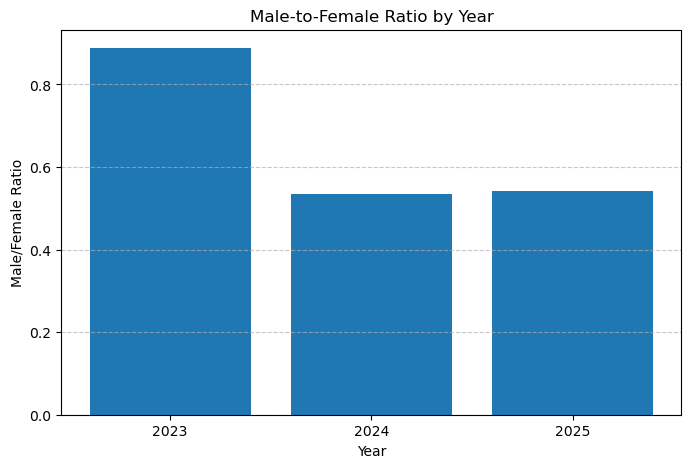

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(gender_count.index.astype(str), gender_count['Male_Female_Ratio'])
plt.title("Male-to-Female Ratio by Year")
plt.xlabel("Year")
plt.ylabel("Male/Female Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [49]:
gender_count['Total'] = gender_count['Male'] + gender_count['Female']
gender_count['Male_%'] = (gender_count['Male'] / gender_count['Total']) * 100
gender_count['Female_%'] = (gender_count['Female'] / gender_count['Total']) * 100
print(gender_count[['Male_%', 'Female_%']])


Gender     Male_%   Female_%
Year                        
2023    47.039474  52.960526
2024    34.877384  65.122616
2025    35.193945  64.806055


In [50]:
age_stats = df_all.groupby('Gender')['Age'].agg(['count', 'min', 'max', 'mean', 'median'])
print(age_stats)


        count   min   max       mean  median
Gender                                      
Female   1724  18.0  60.0  30.675754    28.0
Male     1042  18.0  60.0  31.154511    28.0


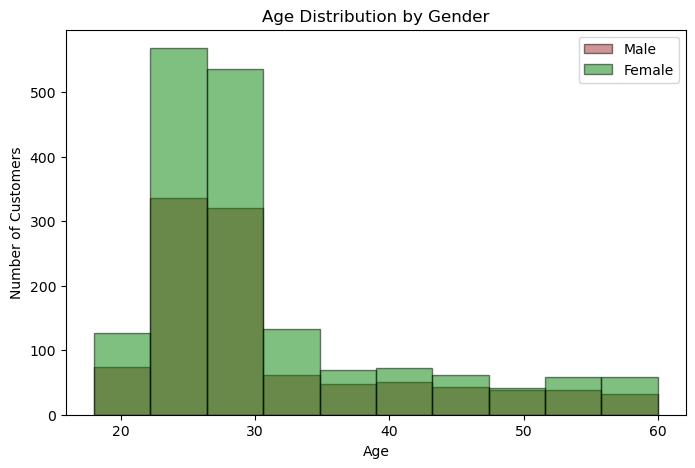

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_all[df_all['Gender']=='Male']['Age'], bins=10, alpha=0.5, label='Male', color='brown', edgecolor='black')
plt.hist(df_all[df_all['Gender']=='Female']['Age'], bins=10, alpha=0.5, label='Female', color='green', edgecolor='black')
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


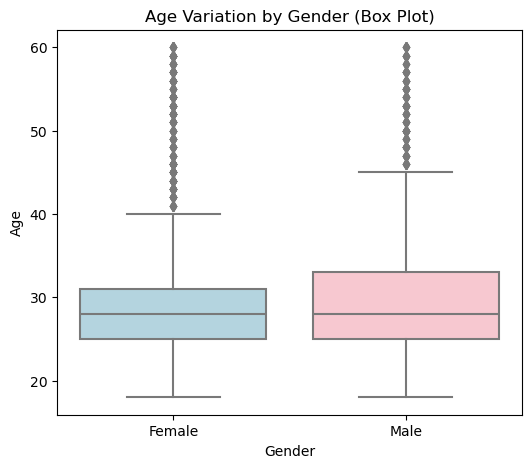

In [52]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Age', data=df_all, palette=['lightblue','pink'])
plt.title("Age Variation by Gender (Box Plot)")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


In [53]:
age_stats = df_all.groupby(['Year','Gender'])['Age'].agg(['count','min','max','mean','median']).reset_index()
print(age_stats)


   Year  Gender  count   min   max       mean  median
0  2023  Female    322  18.0  60.0  38.993789    39.0
1  2023    Male    286  18.0  60.0  38.125874    38.0
2  2024  Female    717  18.0  60.0  28.955370    27.0
3  2024    Male    384  18.0  59.0  28.700521    27.0
4  2025  Female    685  18.0  60.0  28.566423    27.0
5  2025    Male    372  19.0  56.0  28.327957    27.0


In [54]:
most_common_age = df_all['Age'].mode()[0]
print(f"The age with most customers is: {most_common_age}")


The age with most customers is: 29.0


In [55]:
# Year-wise total sell
total_sell = df_all.groupby('Year')['Sell'].sum().reset_index()
total_sell.rename(columns={'Sell':'Total_Sell'}, inplace=True)
print(total_sell)


   Year  Total_Sell
0  2023    364246.0
1  2024    886051.0
2  2025   1209057.5


In [56]:
# Calculate difference compared to previous year
total_sell['Change'] = total_sell['Total_Sell'].diff()
total_sell['Percentage_Change'] = total_sell['Total_Sell'].pct_change() * 100
total_sell.fillna(0, inplace=True)  # 2023 এর জন্য NaN zero করে দিচ্ছি
print(total_sell)


   Year  Total_Sell    Change  Percentage_Change
0  2023    364246.0       0.0           0.000000
1  2024    886051.0  521805.0         143.256206
2  2025   1209057.5  323006.5          36.454617


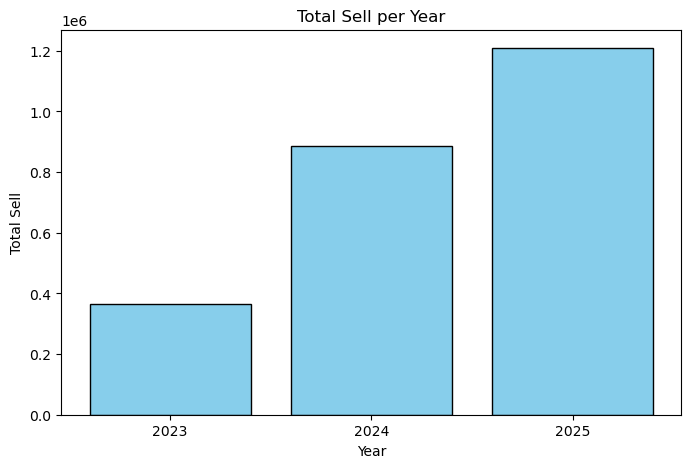

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(total_sell['Year'].astype(str), total_sell['Total_Sell'], color='skyblue', edgecolor='black')
plt.title("Total Sell per Year")
plt.xlabel("Year")
plt.ylabel("Total Sell")
plt.show()


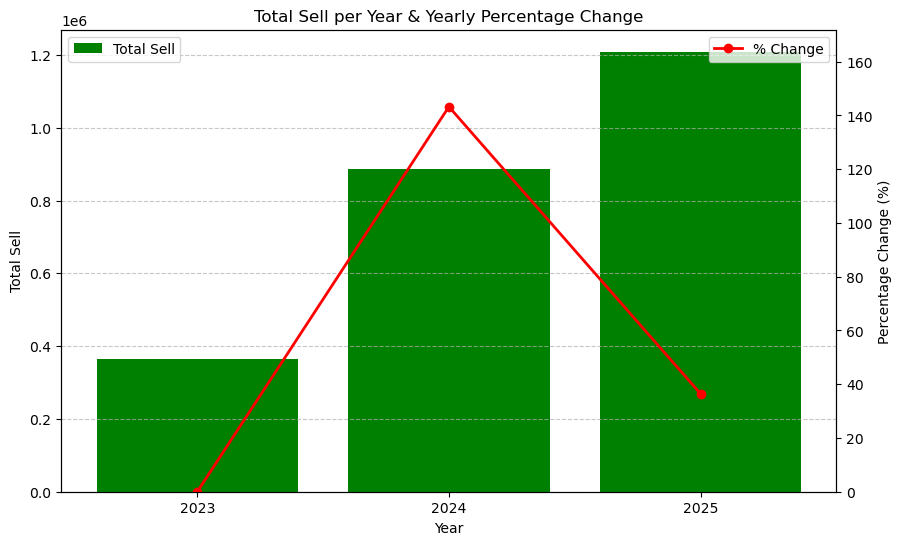

In [58]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for total sell
ax1.bar(total_sell['Year'].astype(str), total_sell['Total_Sell'], color='green', label='Total Sell')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Sell")
ax1.set_title("Total Sell per Year & Yearly Percentage Change")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Line chart for percentage change
ax2 = ax1.twinx()
ax2.plot(total_sell['Year'].astype(str), total_sell['Percentage_Change'], color='red', marker='o', linewidth=2, label='% Change')
ax2.set_ylabel("Percentage Change (%)")
ax2.set_ylim(0, max(total_sell['Percentage_Change'])*1.2)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [59]:
# Pivot table for Male/Female total sell per year
gender_sell = df_all.groupby(['Year','Gender'])['Sell'].sum().unstack(fill_value=0)
gender_sell['Total_Sell'] = gender_sell.sum(axis=1)
gender_sell['Male_Female_Ratio'] = gender_sell['Male'] / gender_sell['Female']

# % Increase in Total Sell
gender_sell['Percentage_Change'] = gender_sell['Total_Sell'].pct_change() * 100
gender_sell.fillna(0, inplace=True)

print(gender_sell)


Gender    Female      Male  Total_Sell  Male_Female_Ratio  Percentage_Change
Year                                                                        
2023    205516.0  158730.0    364246.0           0.772349           0.000000
2024    535263.0  298951.0    834214.0           0.558512         129.024890
2025    765664.0  385377.0   1151041.0           0.503324          37.979104


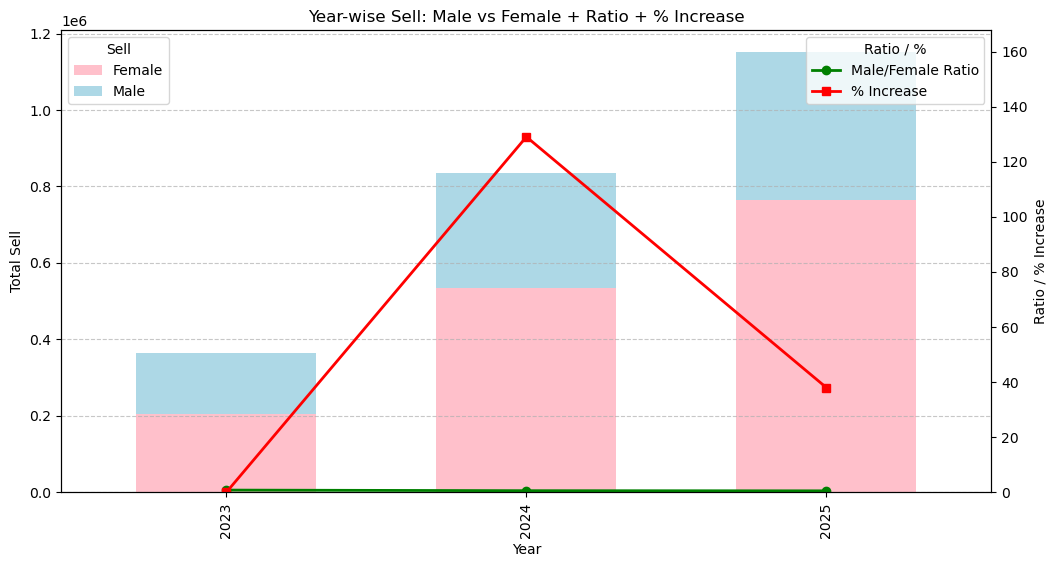

In [60]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Stacked bar for Male & Female Sell
gender_sell[['Female','Male']].plot(kind='bar', stacked=True, ax=ax1, color=['pink','lightblue'], width=0.6)
ax1.set_ylabel("Total Sell")
ax1.set_xlabel("Year")
ax1.set_title("Year-wise Sell: Male vs Female + Ratio + % Increase")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Secondary axis for Male/Female ratio and % Increase
ax2 = ax1.twinx()

# Male/Female Ratio
ax2.plot(gender_sell.index.astype(str), gender_sell['Male_Female_Ratio'], color='green', marker='o', linewidth=2, label='Male/Female Ratio')

# % Increase
ax2.plot(gender_sell.index.astype(str), gender_sell['Percentage_Change'], color='red', marker='s', linewidth=2, label='% Increase')

ax2.set_ylabel("Ratio / % Increase")
ax2.set_ylim(0, max(max(gender_sell['Male_Female_Ratio']), max(gender_sell['Percentage_Change']))*1.3)

# Legends
ax1.legend(loc='upper left', title='Sell')
ax2.legend(loc='upper right', title='Ratio / %')

plt.show()


In [61]:
# যদি প্রতিটি row একটা book sale represent করে
books_sold_per_year = df_all.groupby('Year').size().reset_index(name='Books_Sold')
print(books_sold_per_year)


   Year  Books_Sold
0  2023        3080
1  2024        5019
2  2025        5316


In [62]:
books_sold_per_year['Change'] = books_sold_per_year['Books_Sold'].diff()
books_sold_per_year['Perc_Change'] = books_sold_per_year['Books_Sold'].pct_change() * 100
books_sold_per_year.fillna(0, inplace=True)
print(books_sold_per_year)


   Year  Books_Sold  Change  Perc_Change
0  2023        3080     0.0     0.000000
1  2024        5019  1939.0    62.954545
2  2025        5316   297.0     5.917513


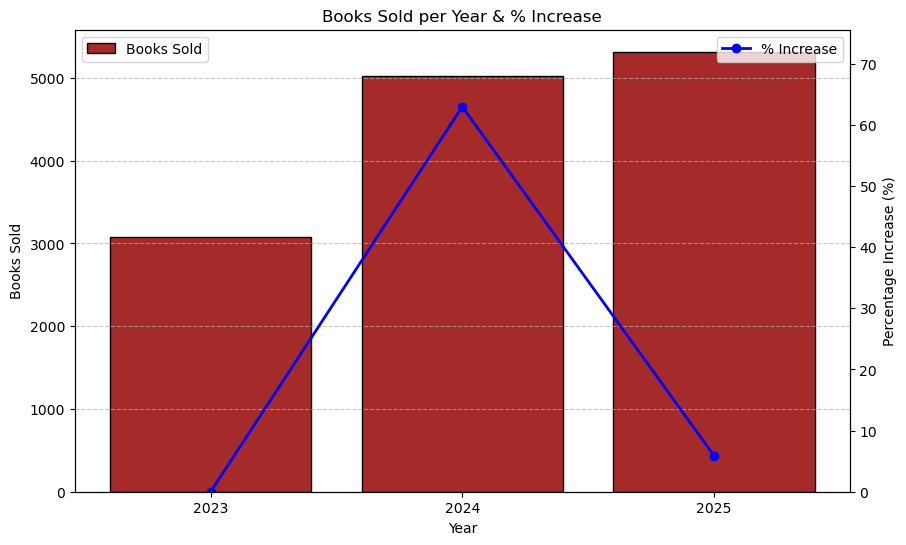

In [63]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Books Sold
ax1.bar(books_sold_per_year['Year'].astype(str), books_sold_per_year['Books_Sold'], color='brown', edgecolor='black')
ax1.set_xlabel("Year")
ax1.set_ylabel("Books Sold")
ax1.set_title("Books Sold per Year & % Increase")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Line chart for % Increase
ax2 = ax1.twinx()
ax2.plot(books_sold_per_year['Year'].astype(str), books_sold_per_year['Perc_Change'], color='blue', marker='o', linewidth=2, label='% Increase')
ax2.set_ylabel("Percentage Increase (%)")
ax2.set_ylim(0, max(books_sold_per_year['Perc_Change'])*1.2)

# Legends
ax1.legend(['Books Sold'], loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [64]:
# Repeated customers only
repeated_customers = df_all[df_all['Repeated Customer?'].str.upper() == 'YES']

print(f"Total Repeated Customers: {len(repeated_customers)}")


Total Repeated Customers: 1108


In [65]:
# Gender clean
repeated_customers['Gender'] = repeated_customers['Gender'].str.strip().str.title()

# Count by Gender
gender_repeat_count = repeated_customers['Gender'].value_counts()
print(gender_repeat_count)


Gender
Female    671
Male      437
Name: count, dtype: int64


C:\Users\MY COMPUTER\AppData\Local\Temp\ipykernel_1776\1287260071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeated_customers['Gender'] = repeated_customers['Gender'].str.strip().str.title()


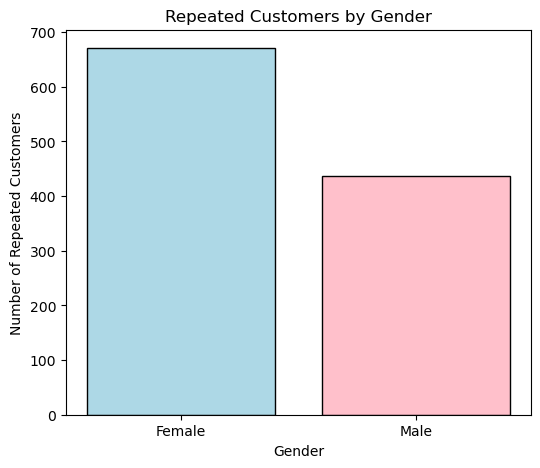

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.bar(gender_repeat_count.index, gender_repeat_count.values, color=['lightblue','pink'], edgecolor='black')
plt.title("Repeated Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Repeated Customers")
plt.show()


In [67]:
# Repeated customers only
repeated_customers = df_all[df_all['Repeated Customer?'].str.upper() == 'YES']

# Gender clean
repeated_customers['Gender'] = repeated_customers['Gender'].str.strip().str.title()


C:\Users\MY COMPUTER\AppData\Local\Temp\ipykernel_1776\2039302006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeated_customers['Gender'] = repeated_customers['Gender'].str.strip().str.title()


In [68]:
# Year + Gender-wise repeated customer count
year_gender_repeat = repeated_customers.groupby(['Year','Gender']).size().unstack(fill_value=0)
print(year_gender_repeat)


Gender  Female  Male
Year                
2023       116   130
2024       287   154
2025       268   153


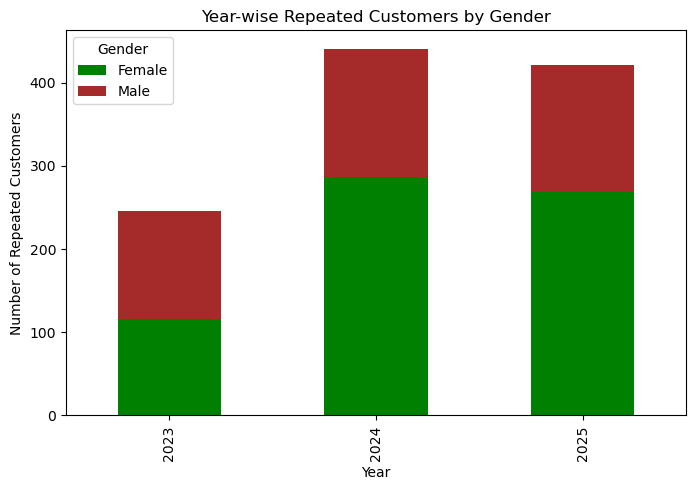

In [69]:
import matplotlib.pyplot as plt

year_gender_repeat.plot(kind='bar', stacked=True, figsize=(8,5), color=['green','brown'])
plt.title("Year-wise Repeated Customers by Gender")
plt.xlabel("Year")
plt.ylabel("Number of Repeated Customers")
plt.show()


In [70]:
import pandas as pd

# Delivery Method count
delivery_count = df_all['Delivery Method'].value_counts()
print(delivery_count)


Delivery Method
Courier (Office)       1573
Cash On (Steadfast)     920
Home (Steadfast)        162
Courier (Home)           98
In Person                78
Name: count, dtype: int64


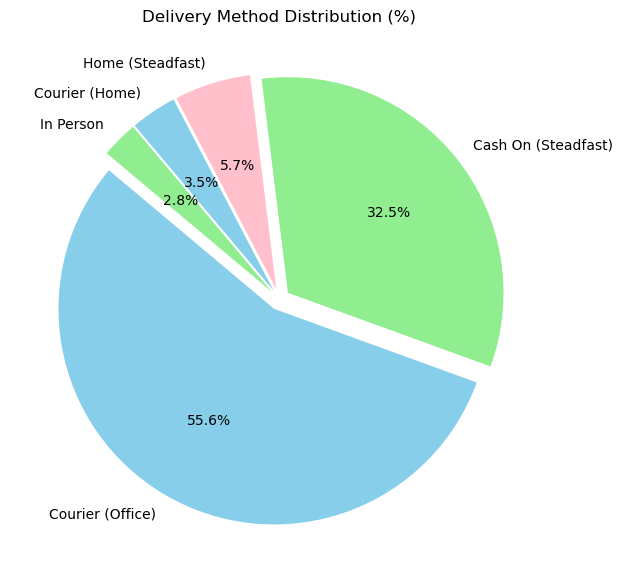

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.pie(delivery_count, labels=delivery_count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue','lightgreen','pink'], explode=[0.05]*len(delivery_count))
plt.title("Delivery Method Distribution (%)")
plt.show()


In [72]:
import pandas as pd

# Year + Delivery Method-wise count
delivery_trend = df_all.groupby(['Year','Delivery Method']).size().unstack(fill_value=0)
print(delivery_trend)


Delivery Method  Cash On (Steadfast)  Courier (Home)  Courier (Office)  \
Year                                                                     
2023                              55              65               458   
2024                             186              24               820   
2025                             679               9               295   

Delivery Method  Home (Steadfast)  In Person  
Year                                          
2023                           16         13  
2024                           73         32  
2025                           73         33  


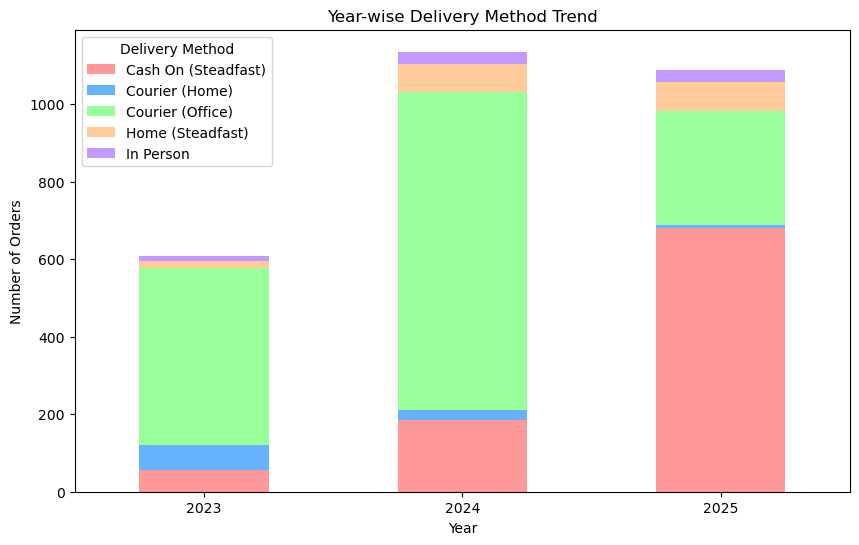

In [73]:
import matplotlib.pyplot as plt

# Custom colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C299FF']  # Add more if needed

delivery_trend.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title("Year-wise Delivery Method Trend")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.legend(title="Delivery Method")
plt.show()


In [74]:
df_all['Profit'] = df_all['Sell'] - df_all['Cost']


In [75]:
# ধরো 'Order Date' column আছে
df_all['Order Date'] = pd.to_datetime(df_all['Order Date'])
df_all['Year'] = df_all['Order Date'].dt.year


In [76]:
# Year-wise total profit
profit_per_year = df_all.groupby('Year')['Profit'].sum().reset_index()
print(profit_per_year)


     Year     Profit
0  2023.0   333543.0
1  2024.0   751742.0
2  2025.0  1117356.5


In [77]:
profit_per_year['Profit_Change'] = profit_per_year['Profit'].diff()
profit_per_year['Profit_Change_%'] = profit_per_year['Profit'].pct_change() * 100
profit_per_year.fillna(0, inplace=True)
print(profit_per_year)


     Year     Profit  Profit_Change  Profit_Change_%
0  2023.0   333543.0            0.0         0.000000
1  2024.0   751742.0       418199.0       125.380835
2  2025.0  1117356.5       365614.5        48.635636


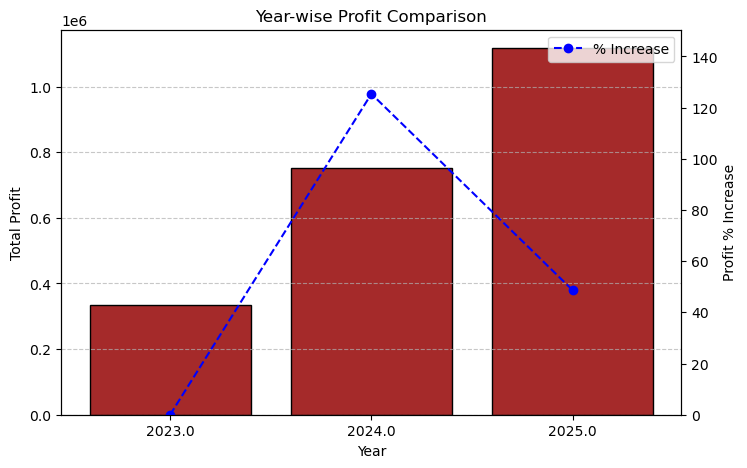

In [78]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar chart for Profit
ax1.bar(profit_per_year['Year'].astype(str), profit_per_year['Profit'], color='brown', edgecolor='black')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Profit")
ax1.set_title("Year-wise Profit Comparison")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Line chart for % increase
ax2 = ax1.twinx()
ax2.plot(profit_per_year['Year'].astype(str), profit_per_year['Profit_Change_%'], color='blue', marker='o', linestyle='--', label='% Increase')
ax2.set_ylabel("Profit % Increase")
ax2.set_ylim(0, max(profit_per_year['Profit_Change_%'])*1.2)
ax2.legend(loc='upper right')

plt.show()


In [79]:
import pandas as pd

# Profit column
df_all['Profit'] = df_all['Sell'] - df_all['Cost']

# Extract Year
df_all['Order Date'] = pd.to_datetime(df_all['Order Date'])
df_all['Year'] = df_all['Order Date'].dt.year

# Year-wise aggregation
yearly_summary = df_all.groupby('Year').agg(
    Total_Sell=('Sell','sum'),
    Total_Profit=('Profit','sum'),
    Books_Sold=('Unit','sum')  # ধরছি Unit column = quantity sold
).reset_index()

# Year-wise % Increase for Profit
yearly_summary['Profit_Change_%'] = yearly_summary['Total_Profit'].pct_change() * 100
yearly_summary.fillna(0, inplace=True)

print(yearly_summary)


     Year  Total_Sell  Total_Profit  Books_Sold  Profit_Change_%
0  2023.0    364026.0      333543.0       687.0         0.000000
1  2024.0    829769.0      751742.0      1188.0       125.380835
2  2025.0   1265339.5     1117356.5      1193.0        48.635636


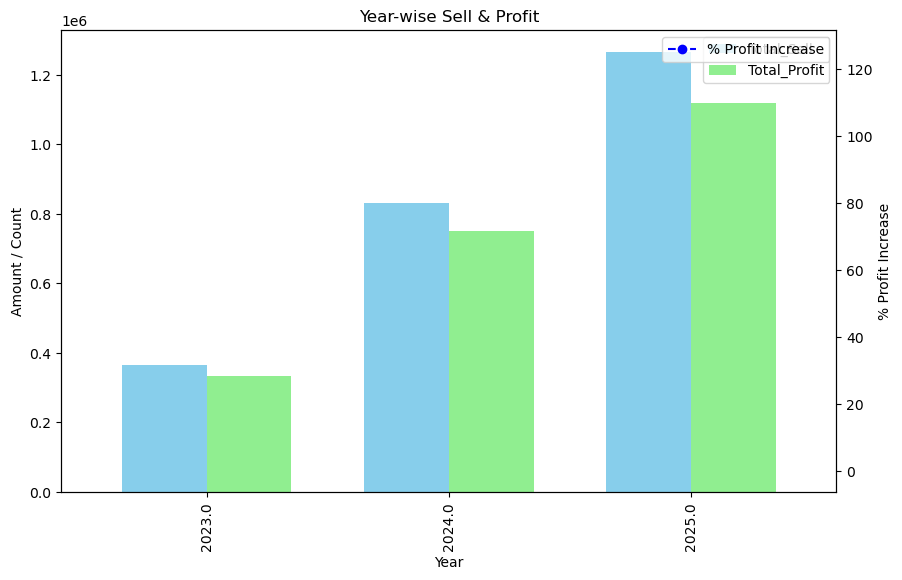

In [80]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

yearly_summary.set_index('Year')[['Total_Sell','Total_Profit']].plot(
    kind='bar', ax=ax1, width=0.7, color=['skyblue','lightgreen']
)

ax1.set_ylabel('Amount / Count')
ax1.set_xlabel('Year')
ax1.set_title('Year-wise Sell & Profit')

# Secondary axis for Profit % Increase
ax2 = ax1.twinx()
ax2.plot(yearly_summary['Year'], yearly_summary['Profit_Change_%'], color='blue', marker='o', linestyle='--', label='% Profit Increase')
ax2.set_ylabel('% Profit Increase')
ax2.legend(loc='upper right')

plt.show()


In [86]:
df_all = pd.concat([df_all, df1], ignore_index=True)


In [109]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Copy dataset
df = df_all.copy()

# Profit (optional)
df['Profit'] = df['Sell'] - df['Cost']

# Year column
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# Encode categorical features
categorical_cols = ['Gender','Category Of Books','Delivery Method']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Target for Classification
df['Repeated_Customer'] = df['Repeated Customer?'].str.strip().str.upper().map({'YES':1,'NO':0})


In [110]:
df['Discount %'].unique()


array([nan, '(ফিক্সড প্রাইস)',
       'থ্রিলবক্স ও বর্ণবক্স ১০টি বইয়ের সেট বিক্রি ৬৫০ টাকা ',
       'শূন্য% ছাড়া', '৫% ছাড়', '১৪% ছাড়', '১৫% ছাড়', '২০% ছাড়',
       '২৫% ছাড়', '২৭% ছাড়', '২৮% ছাড়', '৩০% ছাড়', '৩২% ছাড়', '৩৩% ছাড়',
       '৪৫% ছাড়', '৩৭% ছাড়', '৪০% ছাড়', '৫০% ছাড়', '৫৫% ছাড়', '৭৫ % ছাড়',
       '৩৫% ছাড়', '১০০৳', '৫৭% ছাড়', '১৭% ছাড়', '২০% ছাড়া', '৩৯% ছাড়',
       '৭৫% ছাড়', '৬৮% ছাড়', '৬৬.৭% ছাড়', '৬৪% ছাড়', '৫৩% ছাড়', '৬০% ছাড়',
       '৬৫% ছাড়', '৬১% ছাড়', '৮১.৫% ছাড়', '৫৯% ছাড়', '৫২% ছাড়', '৫৮% ছাড়',
       'নেট সেল', '৩৪% ছাড়', '১৬% ছাড়', '২৪% ছাড়', '৫%', '৪৪% ছাড়',
       '১০% ছাড়', '৯% ছাড়'], dtype=object)

In [111]:
import re

# বাংলা সংখ্যা কে ইংরেজিতে convert করার ফাংশন
def bangla_to_english_number(text):
    bangla_digits = "০১২৩৪৫৬৭৮৯"
    english_digits = "0123456789"
    trans_table = str.maketrans(bangla_digits, english_digits)
    return text.translate(trans_table)

# Discount কলাম পরিষ্কার করা
def clean_discount(value):
    if isinstance(value, str):
        value = bangla_to_english_number(value)
        numbers = re.findall(r'\d+', value)
        if numbers:
            return float(numbers[0])
        else:
            return 0.0
    else:
        return float(value)

df['Discount %'] = df['Discount %'].apply(clean_discount)


In [112]:
df['Discount %'].unique()

array([ nan,   0.,  10.,   5.,  14.,  15.,  20.,  25.,  27.,  28.,  30.,
        32.,  33.,  45.,  37.,  40.,  50.,  55.,  75.,  35., 100.,  57.,
        17.,  39.,  68.,  66.,  64.,  53.,  60.,  65.,  61.,  81.,  59.,
        52.,  58.,  34.,  16.,  24.,  44.,   9.])

In [113]:
df['Discount %'] = df['Discount %'].fillna(0)


In [114]:
df['Discount %'].unique()

array([  0.,  10.,   5.,  14.,  15.,  20.,  25.,  27.,  28.,  30.,  32.,
        33.,  45.,  37.,  40.,  50.,  55.,  75.,  35., 100.,  57.,  17.,
        39.,  68.,  66.,  64.,  53.,  60.,  65.,  61.,  81.,  59.,  52.,
        58.,  34.,  16.,  24.,  44.,   9.])

In [122]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features & Target
X_reg = df[['Age','Gender','Unit','Category Of Books','Delivery Method','Discount %']]
y_reg = df['Sell']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 1️⃣ Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)
print(f"Linear Regression -> R2: {r2_score(y_test_reg, y_pred_lr):.2f}")

# 2️⃣ XGBoost Regressor
xgb_r = XGBRegressor(n_estimators=200, random_state=42)
xgb_r.fit(X_train_reg, y_train_reg)
y_pred_xgb = xgb_r.predict(X_test_reg)
print(f"XGBoost Regressor -> R2: {r2_score(y_test_reg, y_pred_xgb):.2f}")


Linear Regression -> R2: 0.01
XGBoost Regressor -> R2: -0.05


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features & Target
X_clf = df[['Age','Gender','Unit','Category Of Books','Delivery Method','Discount %','Sell']]
y_clf = df['Repeated Customer?']

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Initialize models
clf_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train & Evaluate
clf_results = {}
for name, model in clf_models.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, y_pred)
    clf_results[name] = acc
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_clf, y_pred))


=== Logistic Regression ===
Accuracy: 0.9258
              precision    recall  f1-score   support

          No       0.95      0.98      0.96      3159
         Yes       0.37      0.19      0.26       222

    accuracy                           0.93      3381
   macro avg       0.66      0.59      0.61      3381
weighted avg       0.91      0.93      0.91      3381

=== Decision Tree ===
Accuracy: 0.9181
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      3159
         Yes       0.37      0.37      0.37       222

    accuracy                           0.92      3381
   macro avg       0.67      0.66      0.66      3381
weighted avg       0.92      0.92      0.92      3381

=== Random Forest ===
Accuracy: 0.9225
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      3159
         Yes       0.41      0.40      0.40       222

    accuracy                           0.92      3381
   ma

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


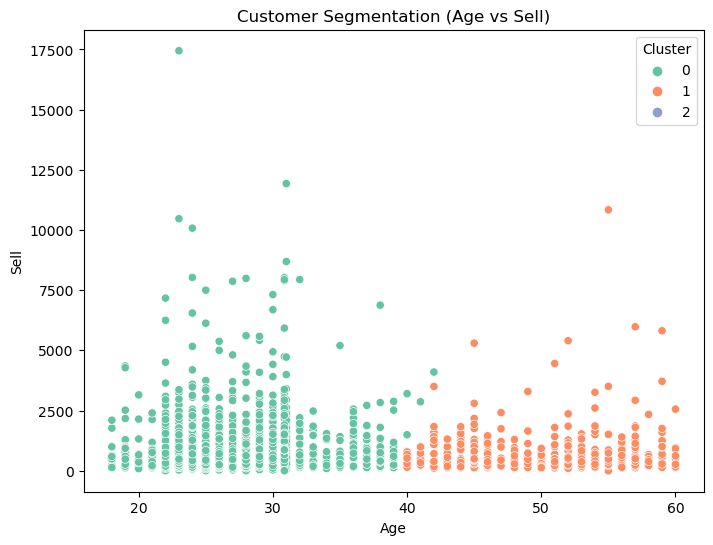

In [125]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Features for clustering
X_cluster = df[['Age','Sell','Unit']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters: Age vs Sell
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Sell', hue='Cluster', palette='Set2')
plt.title("Customer Segmentation (Age vs Sell)")
plt.show()


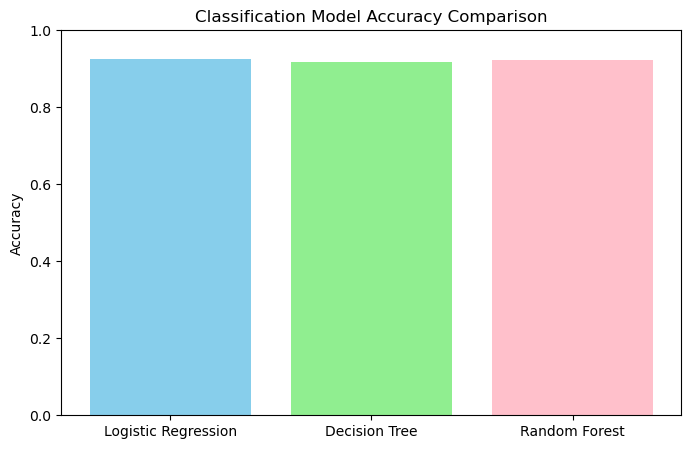

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(clf_results.keys(), clf_results.values(), color=['skyblue','lightgreen','pink','orange'])
plt.ylim(0,1)
plt.title("Classification Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [131]:
print(reg_results)


{'Linear Regression': 0.005935026350093575, 'XGBoost Regressor': -0.04774087016825512}


In [137]:
df = df_all.copy()

# Encode categorical columns
categorical_cols = ['Gender','Category Of Books','Delivery Method']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Fill numeric missing values
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Target encoding
df['Repeated_Customer'] = df['Repeated Customer?'].str.strip().str.upper().map({'YES':1,'NO':0})


C:\Users\MY COMPUTER\AppData\Local\Temp\ipykernel_1776\1602828435.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_retention = df.groupby('Age_Group')['Repeated_Customer'].mean() * 100


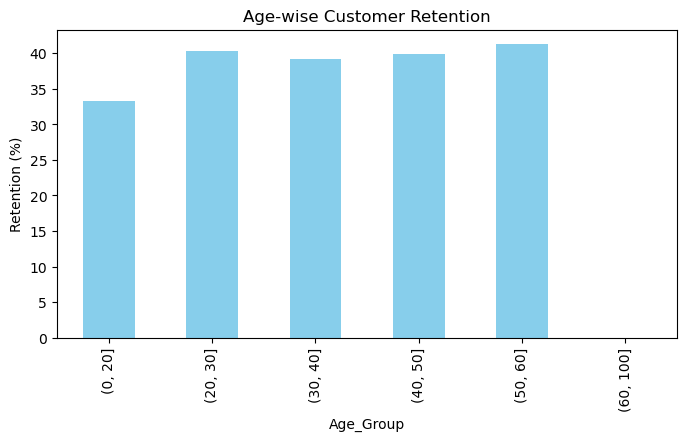

In [138]:
age_bins = [0,20,30,40,50,60,100]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

age_retention = df.groupby('Age_Group')['Repeated_Customer'].mean() * 100

plt.figure(figsize=(8,4))
age_retention.plot(kind='bar', color='skyblue')
plt.ylabel("Retention (%)")
plt.title("Age-wise Customer Retention")
plt.show()


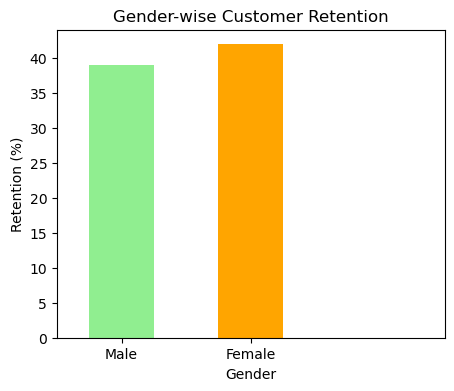

In [139]:
gender_retention = df.groupby('Gender')['Repeated_Customer'].mean() * 100

plt.figure(figsize=(5,4))
gender_retention.plot(kind='bar', color=['lightgreen','orange'])
plt.ylabel("Retention (%)")
plt.title("Gender-wise Customer Retention")
plt.xticks([0,1], ['Male','Female'], rotation=0)
plt.show()


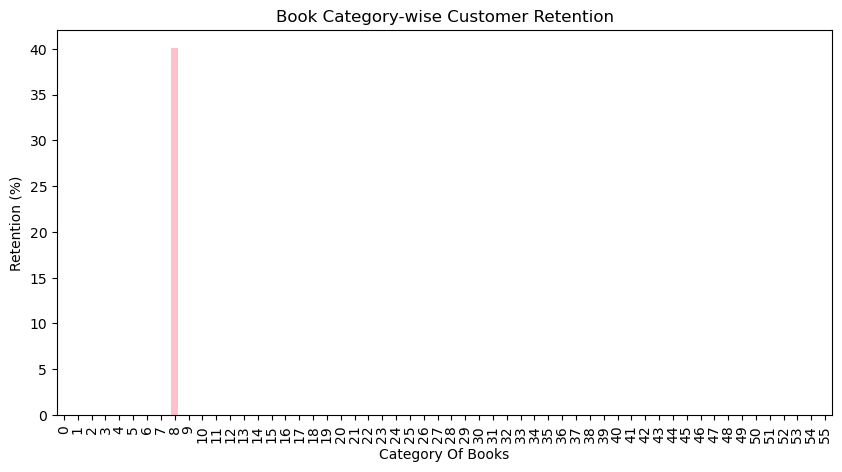

In [140]:
category_retention = df.groupby('Category Of Books')['Repeated_Customer'].mean() * 100

plt.figure(figsize=(10,5))
category_retention.plot(kind='bar', color='pink')
plt.ylabel("Retention (%)")
plt.title("Book Category-wise Customer Retention")
plt.show()


In [141]:
# Features for clustering
cluster_features = ['Age','Gender','Unit','Category Of Books','Sell']
X_cluster = df[cluster_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


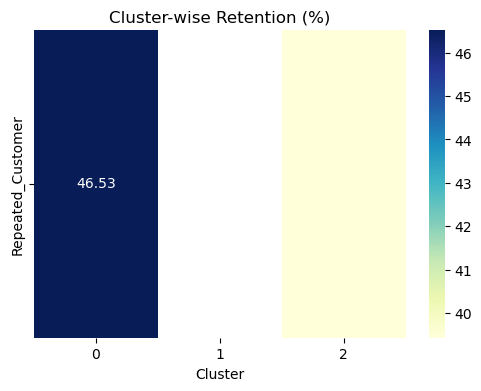

In [142]:
cluster_retention = df.groupby('Cluster')['Repeated_Customer'].mean() * 100

plt.figure(figsize=(6,4))
sns.heatmap(cluster_retention.to_frame().T, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Cluster-wise Retention (%)")
plt.show()


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

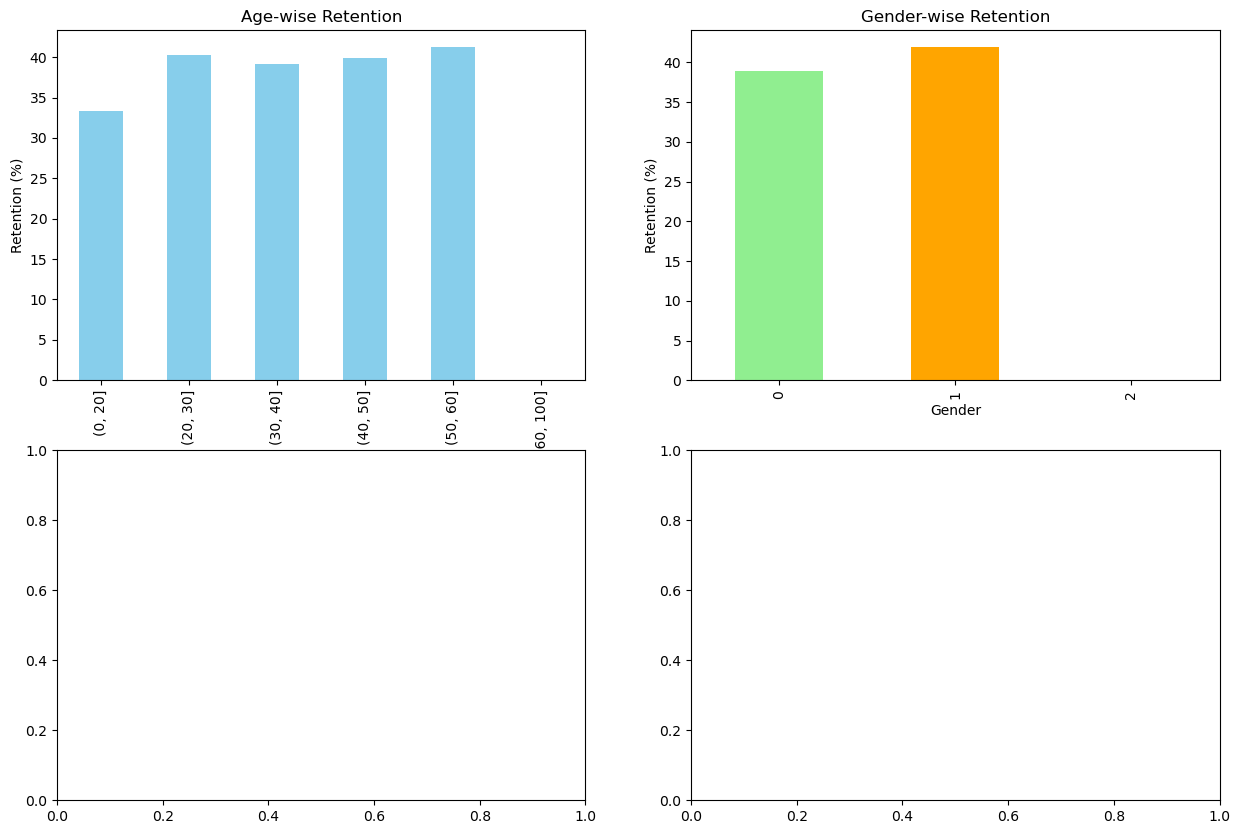

In [143]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

# Age
age_retention.plot(kind='bar', ax=axs[0,0], color='skyblue')
axs[0,0].set_title("Age-wise Retention")
axs[0,0].set_ylabel("Retention (%)")

# Gender
gender_retention.plot(kind='bar', ax=axs[0,1], color=['lightgreen','orange'])
axs[0,1].set_title("Gender-wise Retention")
axs[0,1].set_ylabel("Retention (%)")
axs[0,1].set_xticklabels(['Male','Female'], rotation=0)

# Category
category_retention.plot(kind='bar', ax=axs[1,0], color='pink')
axs[1,0].set_title("Category-wise Retention")
axs[1,0].set_ylabel("Retention (%)")

# Cluster
sns.heatmap(cluster_retention.to_frame().T, annot=True, fmt=".2f", cmap='YlGnBu', ax=axs[1,1])
axs[1,1].set_title("Cluster-wise Retention (%)")

plt.tight_layout()
plt.show()
